# K-means Clustering

**K-means Clustering** is a popular unsupervised learning algorithm used to identify clusters or groups within a dataset based on similarity. It is highly effective in segmenting data into distinct, non-overlapping subgroups based on their attributes.

## Overview
K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

## Steps Involved in K-means Clustering

1. **Initialization**: Start by selecting k initial centroids randomly. Each centroid is the center of a cluster.

2. **Assignment**: Assign each data point to the nearest centroid. These assignments will define the initial clustering.

3. **Update**: Calculate the new centroids as the center (mean) of all data points assigned to each cluster.

4. **Iterate**: Repeat the assignment and update steps until no changes in the centroids occur or a set number of iterations is reached.

5. **Convergence**: The algorithm converges when the assignments no longer change. The final centroids are the centers of the clusters, and the data points are segmented accordingly.

## Algorithm Complexity and Performance
The computational complexity of K-means is typically O(n * k * i * d), where:
- **n** is the number of data points
- **k** is the number of clusters
- **i** is the number of iterations
- **d** is the number of attributes

## Choosing the Number of Clusters (k)
Determining the right number of clusters (k) is critical for the algorithm’s performance and accuracy. Common methods include:
- **Elbow Method**: Plotting the sum of squared distances from each point to its assigned center as a function of k. The "elbow" point, where the rate of decrease sharply shifts, can suggest a good value for k.
- **Silhouette Score**: Evaluating how similar an object is to its own cluster compared to other clusters can provide insight into the effectiveness of the clustering.

## Applications of K-means Clustering
K-means can be used in a variety of applications including:
- **Market Segmentation**: Identifying distinct customer groups based on purchasing patterns.
- **Document Classification**: Grouping documents into topics for better manageability.
- **Image Segmentation**: Enhancing image analysis by segmenting digital images into significant components.

## Limitations
While K-means is powerful, it has limitations:
- Sensitivity to the initial placement of centroids can lead to suboptimal clustering.
- Difficulty in clustering data of varying sizes and density.

## Conclusion
K-means is a straightforward and powerful algorithm for clustering and pattern recognition. Understanding its fundamentals helps in effectively applying it to real-world data challenges.



# K-Means Clustering

The first unsupervised learning technique that we'll go through is k-Means Clustering

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('salary.csv')

# Drop non-numeric or unnecessary columns
df = df.drop(columns=['Player Name', 'Position', 'Team', 'Unnamed: 0'])

# Handle missing values by replacing them with the mean of each column
df.fillna(df.mean(), inplace=True)

# Scale the data to normalize feature scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Directly initialize and fit KMeans with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Attach cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Print the first few rows of the DataFrame to see the cluster labels
print(df.head())

# Optionally, you can analyze each cluster to understand its characteristics
for i in range(3):  # Adjust based on the number of clusters chosen
    cluster = df[df['Cluster'] == i]
    print(f'Cluster {i} Summary:')
    print(cluster.describe())


     Salary  Age  GP  GS    MP    FG   FGA    FG%   3P   3PA  ...  USG%  OWS  \
0  48070014   34  56  56  34.7  10.0  20.2  0.493  4.9  11.4  ...  31.0  5.8   
1  47345760   32  34   3  22.2   4.1   9.9  0.408  1.0   3.2  ...  27.0 -0.4   
2  47080179   34  73  24  29.1   5.9  13.6  0.436  1.2   3.9  ...  27.7 -0.6   
3  44474988   38  55  54  35.5  11.1  22.2  0.500  2.2   6.9  ...  33.3  3.2   
4  44119845   34  47  47  35.6  10.3  18.3  0.560  2.0   4.9  ...  30.7  4.7   

   DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  Cluster  
0  2.0  7.8  0.192   7.5   0.1  7.5   4.7        1  
1  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1        0  
2  2.6  1.9  0.044   0.3  -0.1  0.2   1.2        1  
3  2.4  5.6  0.138   5.5   0.6  6.1   4.0        1  
4  2.1  6.8  0.194   6.0   1.2  7.1   3.9        1  

[5 rows x 49 columns]
Cluster 0 Summary:
             Salary         Age          GP          GS          MP  \
count  2.050000e+02  205.000000  205.000000  205.000000  205.000000   
mean   7.052115e+

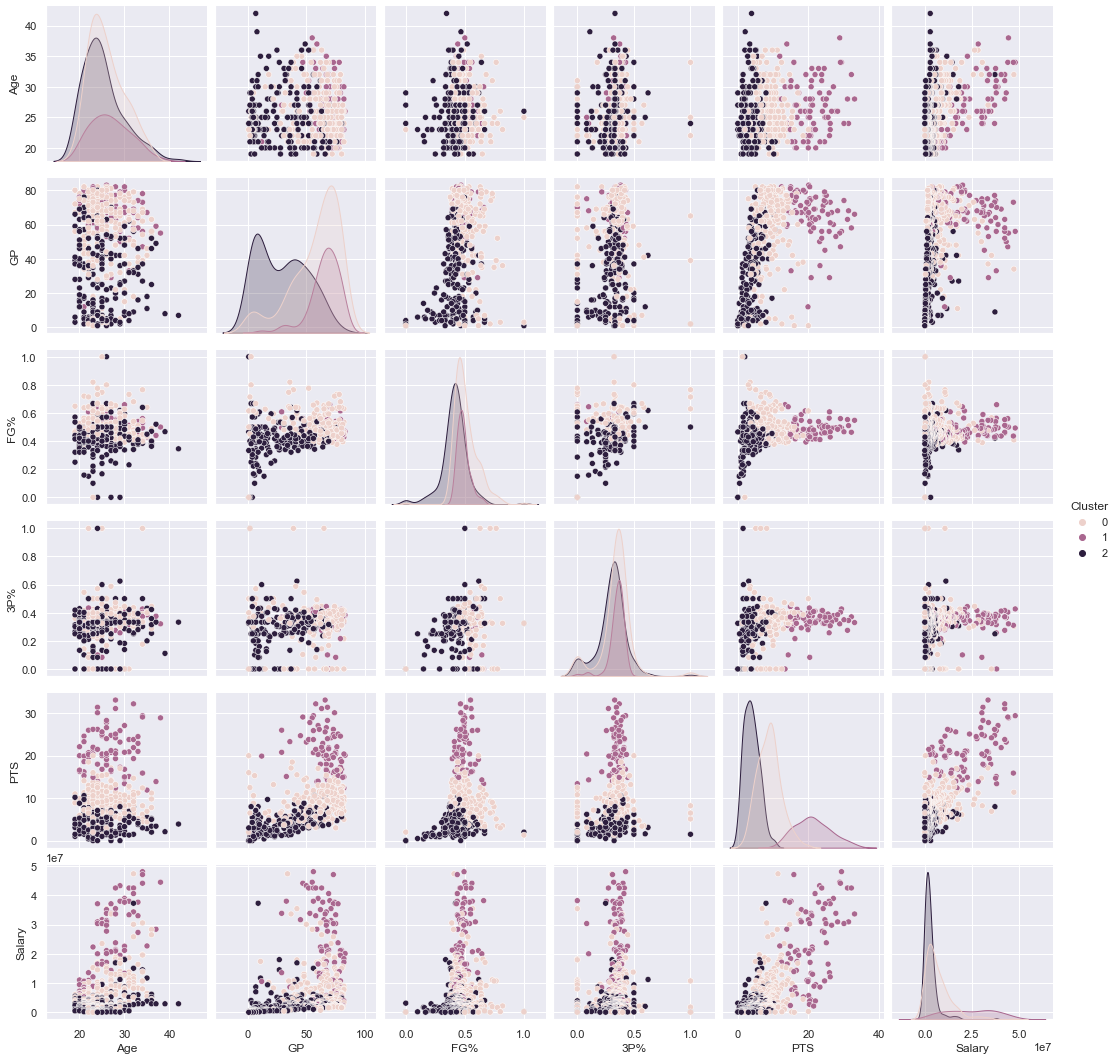

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns if there are too many to plot effectively
plot_columns = ['Age', 'GP', 'FG%', '3P%', 'PTS', 'Salary']  # Example: Age, Games Played, Field Goal Percentage, etc.
sns.pairplot(df[plot_columns + ['Cluster']], hue='Cluster')
plt.show()


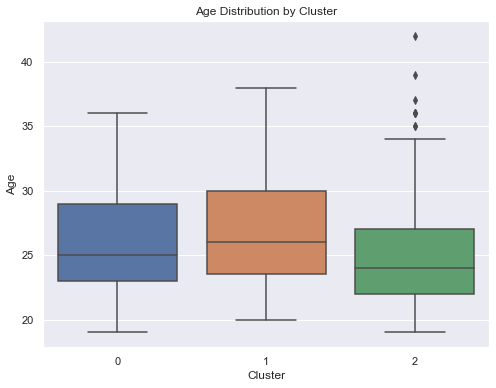

In [38]:
# Example: Plotting 'Age' distribution across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()


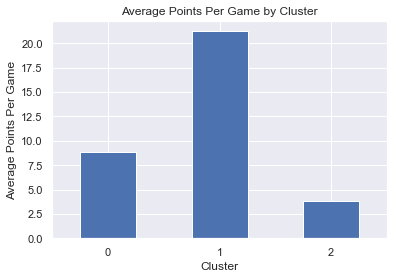

In [39]:
# Mean Points Per Game by Cluster
cluster_means = df.groupby('Cluster')['PTS'].mean()
cluster_means.plot(kind='bar')
plt.title('Average Points Per Game by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Points Per Game')
plt.xticks(rotation=0)
plt.show()


The K-means clustering analysis of the player dataset from "salary.csv" reveals three distinct clusters that encapsulate different player profiles based on their statistical performance and experience. Cluster 0 predominantly consists of older players, likely in the twilight of their careers, characterized by lower points per game and extensive experience. This group may require strategies focused on optimal utilization without overexertion, leveraging their experience in mentoring roles or in critical game moments where their expertise can have a strategic advantage. Cluster 1, the standout cluster, includes players with the highest average points per game, suggesting these are the team’s star players or main scorers. Marketing efforts should focus on these players’ success and prominence, while team strategies should ensure they are well-supported on the court to continue their high performance. Finally, Cluster 2 is marked by younger, less experienced players with the lowest scoring averages, indicating roles as bench players or those still developing their skills. For these players, the focus should be on development and increased game time during less critical moments to enhance their skills and confidence. Overall, this clustering provides valuable insights into managing player rosters, tailoring coaching approaches, and aligning marketing strategies to player profiles, especially when it comes to monetarily valuing players based on their performance. 